In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
def read_dataset(template, start_idx, end_idx):
    frames = [ pd.read_json(f) for f in [template.format(i) for i in range(start_idx, end_idx+1)] ]
    return pd.concat(frames, ignore_index = True)

df = read_dataset("datasets/dataset_initial/dataset_{:02}.json", 0, 17)
df.drop(['patch_version', 'map_crc', 'active_smokes', 'active_molotovs', 'previous_kills', 'planted_bomb'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87132 entries, 0 to 87131
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   map                     87132 non-null  object 
 1   current_score           87132 non-null  object 
 2   round_status            87132 non-null  object 
 3   round_status_time_left  87132 non-null  float64
 4   alive_players           87132 non-null  object 
 5   round_winner            87132 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.0+ MB


In [3]:
def get_attr(ds, team, attr=None):
    team_players = map(lambda players: filter(lambda p: p["team"] == team, players), ds['alive_players'])
    if attr:
        team_players = map(lambda players: map(lambda p: p[attr], players), team_players)
    
    return list(map(lambda p: list(p), team_players))

df['alive_players_t']  = list(map(len, get_attr(df, "Terrorist")))
df['alive_players_ct'] = list(map(len, get_attr(df, "CT")))
df['health_ct']        = list(map(sum, get_attr(df, "CT", "health")))
df['health_t']         = list(map(sum, get_attr(df, "Terrorist", "health")))
df['money_ct']         = list(map(sum, get_attr(df, "CT", "money")))
df['money_t']          = list(map(sum, get_attr(df, "Terrorist", "money")))

df.round_winner = df.round_winner.map(lambda team: 0 if team == "CT" else 1)

df['score_ct'] = df.current_score.map(lambda score: score[0])
df['score_t'] = df.current_score.map(lambda score: score[1])

df.map = df.map.astype('category')
df.round_status = df.round_status.astype('category')

df.drop(['alive_players', 'current_score'], axis=1, inplace=True)

for i in df.loc[lambda df: df.alive_players_t == 6].index:
    df.drop(df.index[i], inplace=True)
df = df.loc[lambda df: df.alive_players_t != 6]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87130 entries, 0 to 87131
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   map                     87130 non-null  category
 1   round_status            87130 non-null  category
 2   round_status_time_left  87130 non-null  float64 
 3   round_winner            87130 non-null  int64   
 4   alive_players_t         87130 non-null  int64   
 5   alive_players_ct        87130 non-null  int64   
 6   health_ct               87130 non-null  int64   
 7   health_t                87130 non-null  int64   
 8   money_ct                87130 non-null  int64   
 9   money_t                 87130 non-null  int64   
 10  score_ct                87130 non-null  int64   
 11  score_t                 87130 non-null  int64   
dtypes: category(2), float64(1), int64(9)
memory usage: 7.5 MB


In [13]:
df.describe()

58271
58274


In [5]:
train, test = train_test_split(df, test_size=0.1)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

62733 train examples
15684 validation examples
8713 test examples


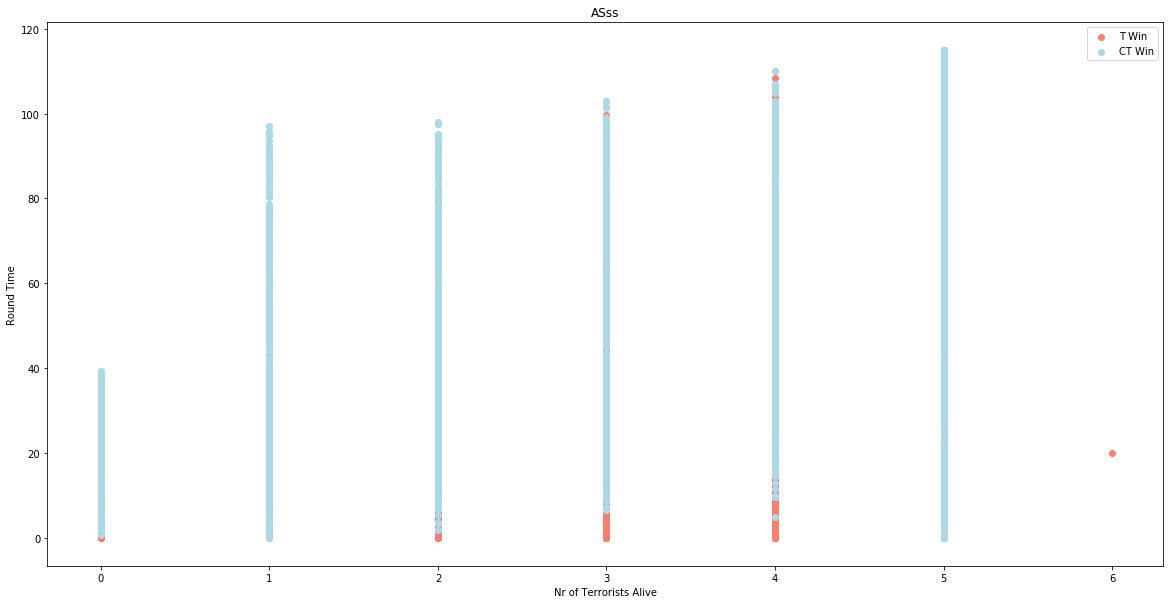

In [6]:
# Create figure
plt.figure(figsize=(20,10))

# Start with T wins
plt.scatter(df.alive_players_t[df.round_winner==1], 
            df.round_status_time_left[df.round_winner==1], 
            c="salmon") # define it as a scatter figure

# Now for CT wins, we want them on the same plot, so we call plt again
plt.scatter(df.alive_players_t[df.round_winner==0], 
            df.round_status_time_left[df.round_winner==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("ASss")
plt.xlabel("Nr of Terrorists Alive")
plt.legend(["T Win", "CT Win"])
plt.ylabel("Round Time");